## Cell 1: Steepest Descent Ascent (SDA) for Constrained Optimization

This code solves the following optimization problem:
**Minimize:** $ f(x_1, x_2) = (x_1 - 2)^2 + (x_2 - 3)^2 $
**Subject to:** $ x_1 + x_2 = 4 $

We use the **Lagrangian method** combined with Steepest Descent Ascent (SDA). The Lagrangian function is:
$ L(x_1, x_2, \lambda) = (x_1 - 2)^2 + (x_2 - 3)^2 + \lambda(x_1 + x_2 - 4) $

SDA finds the saddle point by:
- **Descending** on the primal variables ($x_1, x_2$) to minimize the function.
- **Ascending** on the dual variable ($\lambda$) to satisfy the constraint.

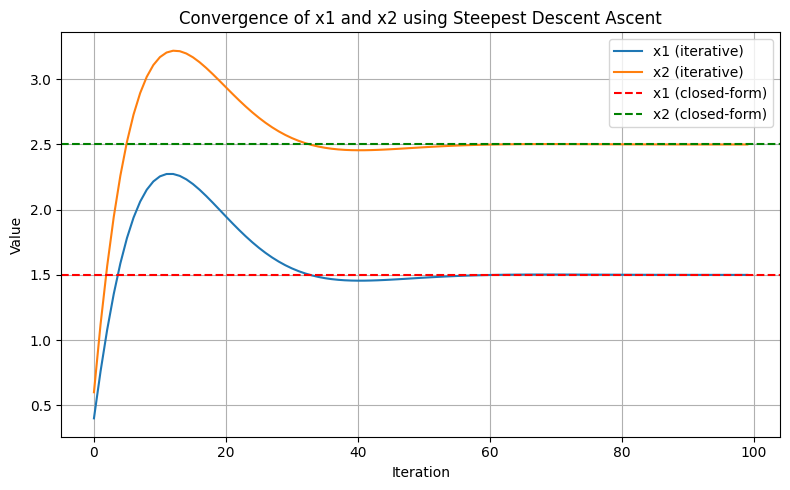

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. CLOSED-FORM SOLUTION (Lagrangian)
# -----------------------------
# This is the exact solution found by setting the gradients of the Lagrangian to zero and solving the system of equations.
# It serves as the ground truth to verify our iterative algorithm's convergence.
x1_closed = 3 / 2  # Analytical solution for x1
x2_closed = 5 / 2  # Analytical solution for x2

# -----------------------------
# 2. ITERATIVE SOLUTION USING SDA on Lagrangian
# -----------------------------
# Initialize the primal (x1, x2) and dual (lam) variables.
x1, x2, lam = 0.0, 0.0, 0.0  # Start with initial guesses

# Hyperparameters for the algorithm.
alpha = 0.1      # Learning rate: controls the step size in each iteration.
iterations = 100 # Number of iterations to run the algorithm.

# Store the history of (x1, x2) values to visualize their convergence path.
history = []

# Main optimization loop.
for _ in range(iterations):
    # Compute gradients of the Lagrangian L with respect to x1, x2, and lambda.
    grad_x1 = 2 * (x1 - 2) + lam   # ∂L/∂x1
    grad_x2 = 2 * (x2 - 3) + lam   # ∂L/∂x2
    grad_lam = x1 + x2 - 4         # ∂L/∂λ

    # Update rules for SDA.
    # For x1 and x2, we perform gradient DESCENT to minimize L.
    x1 -= alpha * grad_x1
    x2 -= alpha * grad_x2
    
    # For lambda, we perform gradient ASCENT to maximize L (enforce the constraint).
    lam += alpha * grad_lam

    # Record the current values of x1 and x2 for plotting.
    history.append((x1, x2))

# Convert the history list to a NumPy array for easier slicing and plotting.
history = np.array(history)

# -----------------------------
# 3. PLOTTING RESULTS
# -----------------------------
plt.figure(figsize=(8, 5)) # Create a figure for the plot.

# Plot the convergence of x1 and x2 from the iterative method.
plt.plot(history[:, 0], label="x1 (iterative)") # Plot x1 values over iterations.
plt.plot(history[:, 1], label="x2 (iterative)") # Plot x2 values over iterations.

# Plot the closed-form solutions as dashed horizontal lines for comparison.
plt.axhline(y=x1_closed, color='r', linestyle='--', label='x1 (closed-form)')
plt.axhline(y=x2_closed, color='g', linestyle='--', label='x2 (closed-form)')

# Add labels and title for clarity.
plt.title("Convergence of x1 and x2 using Steepest Descent Ascent")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()       # Display the legend.
plt.grid(True)     # Add a grid for better readability.
plt.tight_layout() # Adjust plot to prevent labels from overlapping.
plt.show()         # Show the plot.


## Cell 2: Visualizing Gradient Descent

This code demonstrates the **Gradient Descent** algorithm to find the minimum of a simple quadratic function:
**Minimize:** $ f(x) = (x - 3)^2 $

The algorithm starts at an initial point and iteratively takes steps in the direction opposite to the gradient. The gradient is:
$ f'(x) = 2(x - 3) $

The plot visualizes these steps on the function's curve, showing how it converges to the minimum at $ x = 3 $.

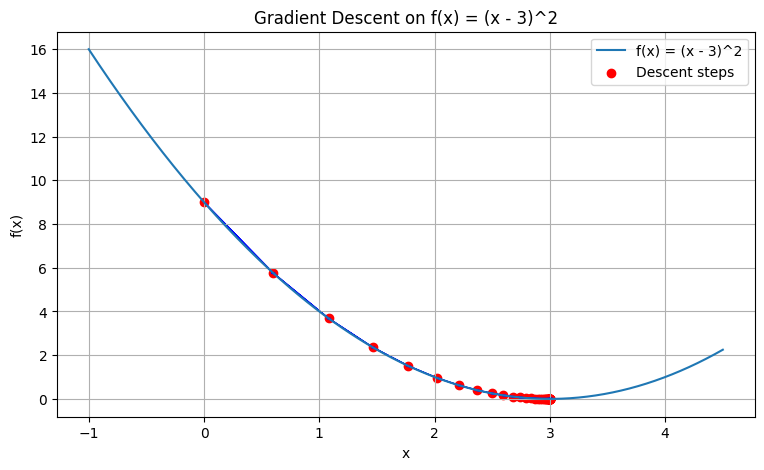

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. DEFINE FUNCTION AND GRADIENT
# -----------------------------
# The objective function we want to minimize.
def f(x):
    return (x - 3)**2

# The gradient (derivative) of the objective function.
def grad_f(x):
    return 2 * (x - 3)

# -----------------------------
# 2. GRADIENT DESCENT PARAMETERS
# -----------------------------
alpha = 0.1               # Learning rate: determines the size of each step.
threshold = 1e-6          # Convergence criterion: the algorithm stops when the step size is smaller than this value.
x = 0                     # Initial starting point for the descent.
steps = [(0, x, f(x))]    # A log to store the history of (iteration, x, f(x)) for plotting.
step = 0

# -----------------------------
# 3. GRADIENT DESCENT LOOP
# -----------------------------
while True:
    # Calculate the gradient at the current point x.
    grad = grad_f(x)
    
    # Update x by taking a step in the opposite direction of the gradient.
    x_new = x - alpha * grad
    
    # Log the new state for plotting.
    steps.append((step + 1, x_new, f(x_new)))
    
    # Check for convergence: if the change in x is very small, we've likely found the minimum.
    if abs(x_new - x) < threshold:
        break # Exit the loop if converged.
    
    # Update x for the next iteration.
    x = x_new
    step += 1

# -----------------------------
# 4. PLOTTING THE RESULTS
# -----------------------------
# Extract the x and f(x) values from our log for plotting.
x_vals = [s[1] for s in steps]
y_vals = [s[2] for s in steps]

# Generate a smooth curve for the function f(x) = (x - 3)^2.
x_plot = np.linspace(-1, 4.5, 300) # Create 300 points from -1 to 4.5 for a smooth plot.
y_plot = f(x_plot)

# Create the plot.
plt.figure(figsize=(9, 5))
plt.plot(x_plot, y_plot, label='f(x) = (x - 3)^2') # Plot the function curve.
plt.scatter(x_vals, y_vals, color='red', label='Descent steps') # Plot the discrete steps taken by the algorithm.

# Add arrows to visualize the direction and magnitude of each step.
for i in range(len(x_vals) - 1):
    plt.arrow(x_vals[i], y_vals[i],            # Arrow start point (x, y)
              x_vals[i+1] - x_vals[i],        # Arrow change in x (dx)
              y_vals[i+1] - y_vals[i],        # Arrow change in y (dy)
              head_width=0.03, head_length=0.06, fc='blue', ec='blue')

# Add labels, title, and other plot elements.
plt.title("Gradient Descent on f(x) = (x - 3)^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
